In [ ]:
# check the versions of key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)


scipy: 1.5.0
numpy: 1.22.2
matplotlib: 3.2.2
pandas: 1.0.5
statsmodels: 0.11.1
sklearn: 0.23.1


### Import Data and Pre-Process Dataset

In [ ]:
# load dataset using read_csv()
from pandas import read_csv


df = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\forecast_dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
                    Time Zone       Fuel Category  Gen MW
Time Stamp                                               
2020-01-01 00:05:00       EST         Natural Gas  1883.0
2020-01-01 00:05:00       EST             Nuclear  5418.0
2020-01-01 00:05:00       EST  Other Fossil Fuels     1.0
2020-01-01 00:05:00       EST    Other Renewables   277.0
2020-01-01 00:05:00       EST                Wind   883.0


In [ ]:
#organize dataset into wind and solar columns, add values together

df_wind = df.loc[df['Fuel Category'] == ("Wind")]
df_wind = df_wind.drop(['Fuel Category', 'Time Zone'], axis=1)
df_wind.rename(columns={'Gen MW': 'Wind GenMW'}, inplace=True)

df_solar = df.loc[df['Fuel Category'] == ("Other Renewables")]
df_solar = df_solar.drop(['Fuel Category', 'Time Zone'], axis=1)
df_solar.rename(columns={'Gen MW': 'Solar GenMW'}, inplace=True)

df_energy = df_wind
df_energy['Solar GenMW'] = df_solar['Solar GenMW']
df_energy

    

,Wind GenMW,Solar GenMW
Time Stamp,,
2020-01-01 00:05:00,883.0,277.0
2020-01-01 00:10:00,851.0,273.0
2020-01-01 00:15:00,852.0,275.0
2020-01-01 00:20:00,863.0,274.0
2020-01-01 00:25:00,861.0,271.0
...,...,...
2022-03-15 23:30:00,224.0,219.0
2022-03-15 23:35:00,219.0,221.0
2022-03-15 23:40:00,209.0,218.0


In [ ]:
#add together values from both renewable energy sources
import pandas as pd

df_energy['Gen MW'] = pd.DataFrame(df_energy.sum(axis=1))
df_energy.drop(df_energy.columns[[0,1]], axis=1, inplace = True)
df_energy

,Gen MW
Time Stamp,
2020-01-01 00:05:00,1160.0
2020-01-01 00:10:00,1124.0
2020-01-01 00:15:00,1127.0
2020-01-01 00:20:00,1137.0
2020-01-01 00:25:00,1132.0
...,...
2022-03-15 23:30:00,443.0
2022-03-15 23:35:00,440.0
2022-03-15 23:40:00,427.0


##### Downsample Dataset into Hourly Values

                          Gen MW
Time Stamp                      
2020-01-01 00:00:00  1140.727273
2020-01-01 01:00:00  1081.250000
2020-01-01 02:00:00  1103.666667
2020-01-01 03:00:00  1166.250000
2020-01-01 04:00:00  1191.666667


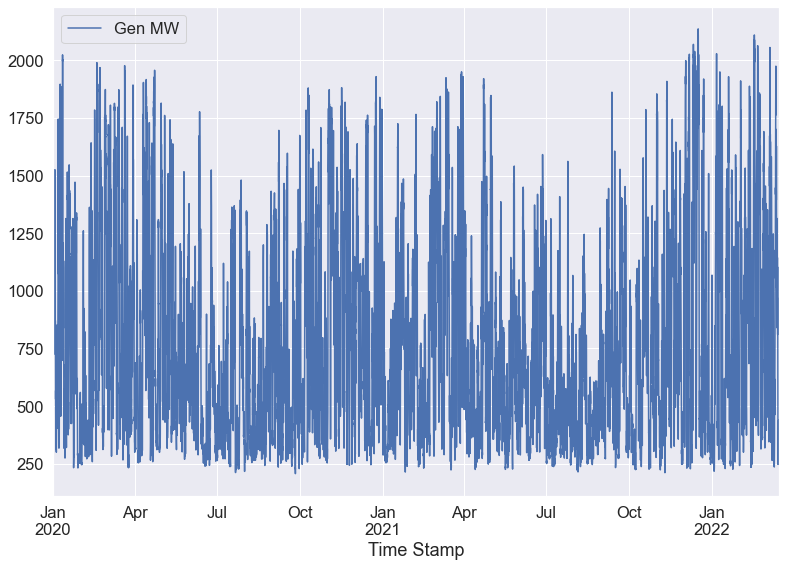

In [ ]:
#resample intervals into mean hourly values
import matplotlib.pyplot as plt


series = df_energy

#define figure size in (width, height) for all plots
plt.rcParams['figure.figsize'] = [13, 9]


resample = series.resample('H')
hourly_mean_mw = resample.mean()
print(hourly_mean_mw.head())
hourly_mean_mw.plot()
plt.show()


df_energy = pd.DataFrame(hourly_mean_mw)

In [ ]:
# calculate descriptive statistics

print(df_energy.describe())

             Gen MW
count  19317.000000
mean     755.619269
std      429.612877
min      206.333333
25%      403.083333
50%      629.333333
75%     1028.750000
max     2136.250000


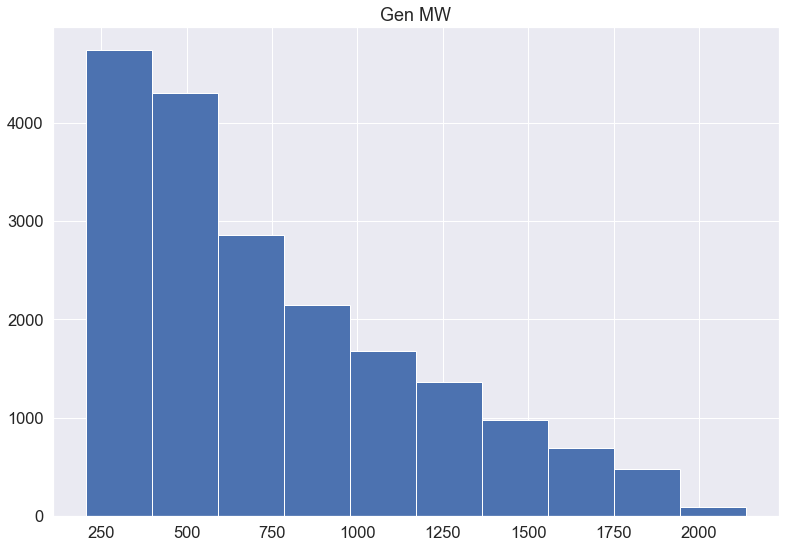

In [ ]:
#create histograms

df_energy.hist()
plt.show()

<Figure size 360x576 with 0 Axes>

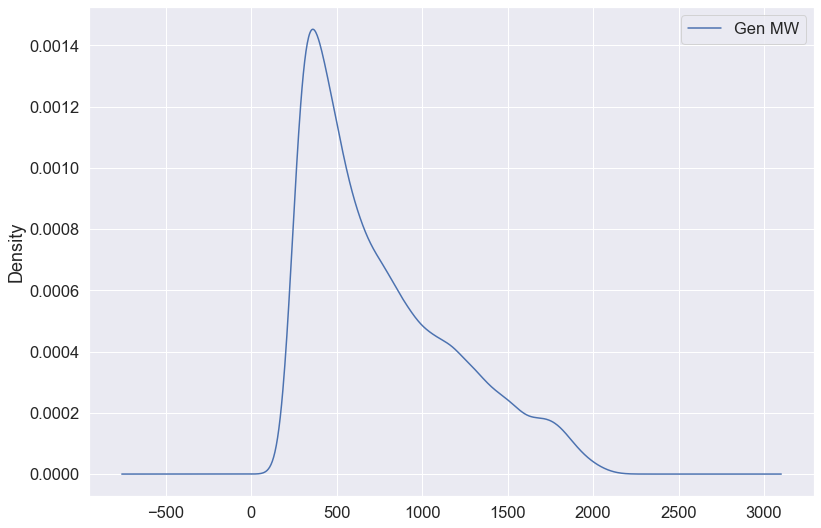

In [ ]:
#create density plots

plt.figure(figsize=(5,8))
df_energy.plot(kind='kde')

plt.show()

In [ ]:
#check for missing values

print(df_energy.isna().any().any())

print(df_energy.isna().sum().sum())


True
3


In [ ]:
#drop missing values

df_energy = df_energy.dropna()

print(df_energy.isna().any().any())

print(df_energy.isna().sum().sum())

False
0


In [ ]:
#decompose time series

from statsmodels.tsa.seasonal import seasonal_decompose
series = df_energy
result = seasonal_decompose(series, model='additive', period=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)


Time Stamp
2020-01-01 00:00:00    1140.727273
2020-01-01 01:00:00    1081.250000
2020-01-01 02:00:00    1103.666667
2020-01-01 03:00:00    1166.250000
2020-01-01 04:00:00    1191.666667
                          ...     
2022-03-15 19:00:00     281.333333
2022-03-15 20:00:00     322.500000
2022-03-15 21:00:00     406.916667
2022-03-15 22:00:00     428.333333
2022-03-15 23:00:00     438.454545
Name: trend, Length: 19317, dtype: float64
Time Stamp
2020-01-01 00:00:00    0.0
2020-01-01 01:00:00    0.0
2020-01-01 02:00:00    0.0
2020-01-01 03:00:00    0.0
2020-01-01 04:00:00    0.0
                      ... 
2022-03-15 19:00:00    0.0
2022-03-15 20:00:00    0.0
2022-03-15 21:00:00    0.0
2022-03-15 22:00:00    0.0
2022-03-15 23:00:00    0.0
Name: seasonal, Length: 19317, dtype: float64
Time Stamp
2020-01-01 00:00:00    0.0
2020-01-01 01:00:00    0.0
2020-01-01 02:00:00    0.0
2020-01-01 03:00:00    0.0
2020-01-01 04:00:00    0.0
                      ... 
2022-03-15 19:00:00    0.0
2022-03

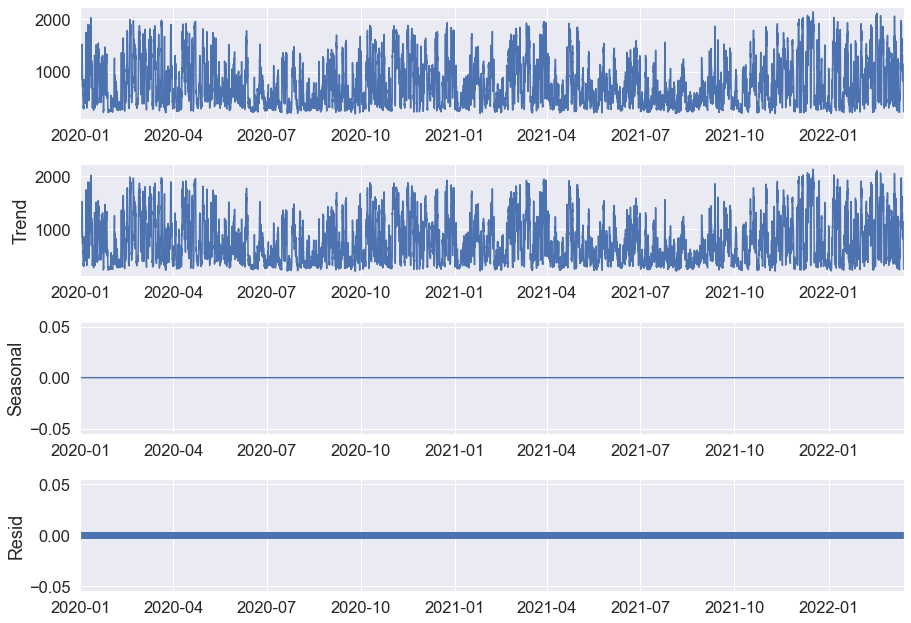

In [ ]:
#plot the decompisition
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()


In [ ]:
# calculate the stationarity 'd' for the time series

from statsmodels.tsa.stattools import adfuller

result = adfuller(df_energy)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    


ADF Statistic: -13.493409
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Construct Forecasting Model

### Run Auta-Arima to Determine Best Parameters

In [ ]:
#construct auto-ARIMA model
! pip install pmdarima

#from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_energy, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=11, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1955253.833, Time=19.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3671244.505, Time=2.95 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=3.76 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3364827.445, Time=39.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1954477.868, Time=25.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=4.91 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1954623.422, Time=148.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1952760.272, Time=127.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1955005.834, Time=30.56 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1953181.642, Time=93.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1953538.382, Time=63.85 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1953655.235, Time=19.14 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1952854.646, Time=118.79 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1952381.604, Time=387

### Develop and Save Univariate ARIMA Model to File

In [ ]:
# fit the ARIMA model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy


# load dataset
series = df_energy.values
#series.index = series.index.to_period('m')


# fit model
model = ARIMA(series, order=(2,0,2))
model_fit = model.fit()


series = df_energy


# save model to file
model_fit.save('arima_model.pkl')
# save the dataset
numpy.save('arima_data.npy', df_energy)
# save the last ob
numpy.save('arima_obs.npy', [series.values[-1]])


In [ ]:
# load ARIMA model from file and make a one-step prediction
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
# load model
model = AutoRegResults.load('arima_model.pkl')
data = numpy.load('arima_data.npy')
last_ob = numpy.load('arima_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 895.224141


In [ ]:
# multi-step out-of-sample forecast
import pandas as pd

start_index = len(data)
end_index = start_index + 23
forecast = model.predict(start=start_index, end=end_index)

df_forecast = pd.DataFrame(forecast)
df_forecast.columns = ['Predict_GenMW']

print(df_forecast)

    Predict_GenMW
0      456.769595
1      476.047224
2      494.422682
3      511.840295
4      528.279649
5      543.744860
6      558.256767
7      571.847282
8      584.555303
9      596.423801
10     607.497736
11     617.822602
12     627.443415
13     636.404033
14     644.746706
15     652.511806
16     659.737667
17     666.460521
18     672.714489
19     678.531616
20     683.941929
21     688.973523
22     693.652645
23     698.003792


##### Import Forecasted Load-Data Values

In [ ]:
# load dataset using read_csv()
from pandas import read_csv


df_load = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220316isolf.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(type(df_load))
df_load.head()

<class 'pandas.core.frame.DataFrame'>


,Capitl,Centrl,Dunwod,Genese,Hud Vl,Longil,Mhk Vl,Millwd,N.Y.C.,North,West,NYISO
Time Stamp,,,,,,,,,,,,
2022-03-16 00:00:00,1126,1471,495,940,821,1676,668,245,4341,658,1505,13946
2022-03-16 01:00:00,1104,1451,478,921,797,1612,652,241,4191,660,1478,13585
2022-03-16 02:00:00,1086,1436,465,906,780,1561,639,237,4055,660,1469,13294
2022-03-16 03:00:00,1087,1436,457,908,777,1542,640,237,3985,658,1470,13197
2022-03-16 04:00:00,1117,1470,462,937,790,1582,654,247,4018,663,1484,13424


In [ ]:
#pre-process load dataset, match dataframe length
df_load = pd.DataFrame(df_load['NYISO'][:24])
#, axis=1, inplace=True)
df_load.describe()

,NYISO
count,24.000000
mean,15184.291667
std,1225.735005
min,13197.000000
25%,14263.000000
50%,15187.000000
75%,16286.000000
max,16964.000000


##### Calculate Proportion of Future Load Supplied by Renewables

In [ ]:
df_future_trend = pd.DataFrame(df_forecast['Predict_GenMW'].values/df_load['NYISO'].values)
df_future_trend.columns = ['Forecast']
df_future_trend.head()

,Forecast
0,0.032753
1,0.035042
2,0.037191
3,0.038785
4,0.039353


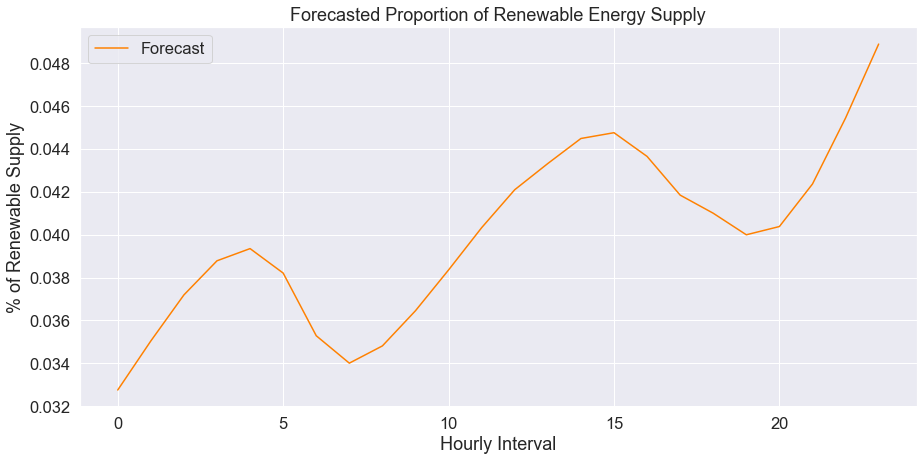

In [ ]:
import seaborn as sns

sns.set(rc={"figure.figsize":(15, 7)})
sns.set(font_scale=1.5)

ax = sns.lineplot(data = df_future_trend,
                 color='g', palette="afmhot")
                          
ax.set(xlabel='Hourly Interval',
       ylabel='% of Renewable Supply',
       title='Forecasted Proportion of Renewable Energy Supply')

plt.show()

#### Calculate Model Accuracy

In [ ]:
df_20220315 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220315rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_20220316 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220316rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

df_actuals = pd.concat([df_20220315, df_20220316], axis=0)
df_actuals

,Time Zone,Fuel Category,Gen MW
Time Stamp,,,
2022-03-15 00:05:00,EDT,Dual Fuel,3013.0
2022-03-15 00:05:00,EDT,Natural Gas,2466.0
2022-03-15 00:05:00,EDT,Nuclear,2059.0
2022-03-15 00:05:00,EDT,Other Fossil Fuels,3.0
2022-03-15 00:05:00,EDT,Other Renewables,229.0
...,...,...,...
2022-03-16 10:25:00,EDT,Nuclear,2006.0
2022-03-16 10:25:00,EDT,Other Fossil Fuels,3.0
2022-03-16 10:25:00,EDT,Other Renewables,238.0


In [ ]:
#organize dataset into wind and solar columns, add values together

df_wind_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Wind")]
df_wind_ac = df_wind_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_wind_ac.rename(columns={'Gen MW': 'Wind GenMW'}, inplace=True)

df_solar_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Other Renewables")]
df_solar_ac = df_solar_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_solar_ac.rename(columns={'Gen MW': 'Solar GenMW'}, inplace=True)

df_energy_ac = df_wind_ac
df_energy_ac['Solar GenMW'] = df_solar_ac['Solar GenMW']
df_energy_ac.head()

    

,Wind GenMW,Solar GenMW
Time Stamp,,
2022-03-15 00:05:00,775.0,229.0
2022-03-15 00:10:00,763.0,227.0
2022-03-15 00:15:00,752.0,221.0
2022-03-15 00:20:00,749.0,219.0
2022-03-15 00:25:00,749.0,218.0


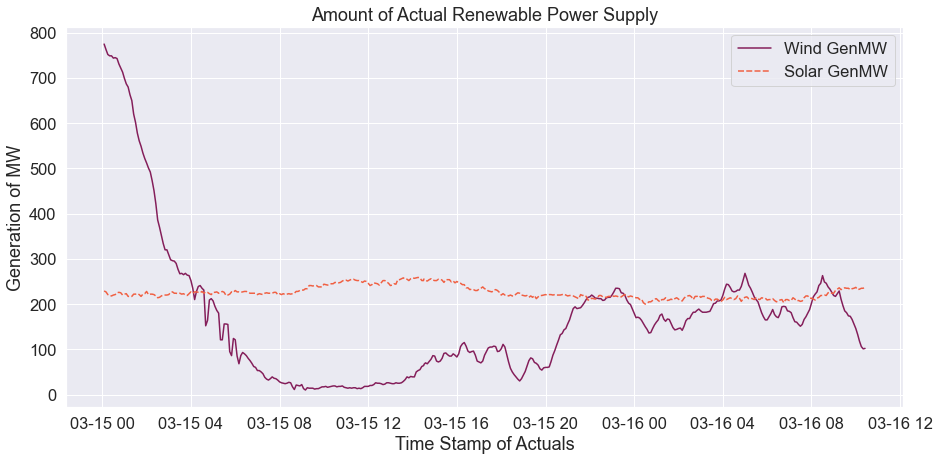

In [ ]:
ax = sns.lineplot(data = df_energy_ac,
                 color='g', palette="rocket")
                          
ax.set(xlabel='Time Stamp of Actuals',
       ylabel= 'Generation of MW',
       title='Amount of Actual Renewable Power Supply')

plt.show()


In [ ]:
## combine values from both sources

df_energy_ac['Gen MW'] = pd.DataFrame(df_energy_ac.sum(axis=1))
df_energy_ac.drop(df_energy_ac.columns[[0,1]], axis=1, inplace = True)
df_energy_ac.describe()

,Gen MW
count,413.000000
mean,392.099274
std,150.058669
min,235.000000
25%,290.000000
50%,365.000000
75%,429.000000
max,1004.000000


In [ ]:
#match Time Stamp values from end of historical data

df_energy_today = df_energy_ac[288:]
df_energy_today.head()

,Gen MW
Time Stamp,
2022-03-16 00:05:00,384.0
2022-03-16 00:10:00,385.0
2022-03-16 00:15:00,379.0
2022-03-16 00:20:00,375.0
2022-03-16 00:25:00,360.0


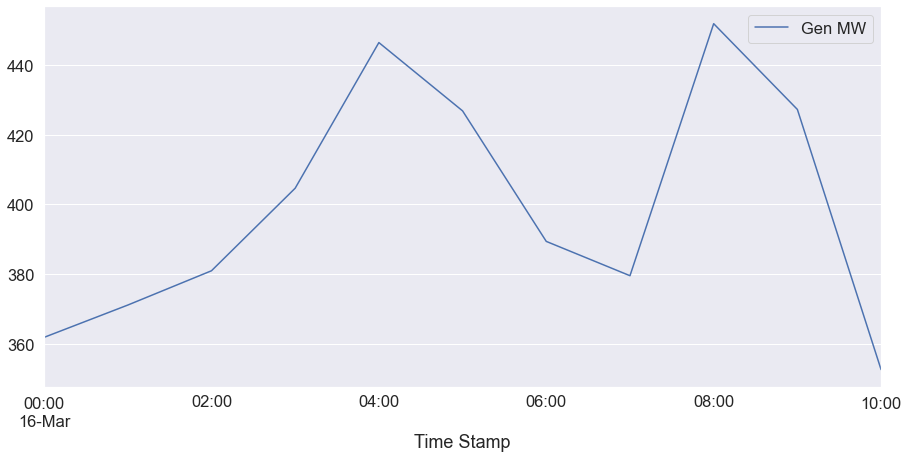

In [ ]:
#resample intervals into mean hourly values

series = df_energy_today

resample = series.resample('H')
hourly_mean_mw = resample.mean()
#print(hourly_mean_mw.head())
hourly_mean_mw.plot()
plt.show()


df_energy_today = pd.DataFrame(hourly_mean_mw)

In [ ]:
#series = df_forecast.values

df_energy_today['Forecast'] = df_forecast.values[:11]
df_energy_today

,Gen MW,Forecast
Time Stamp,,
2022-03-16 00:00:00,361.909091,456.769595
2022-03-16 01:00:00,371.166667,476.047224
2022-03-16 02:00:00,381.000000,494.422682
2022-03-16 03:00:00,404.666667,511.840295
2022-03-16 04:00:00,446.416667,528.279649
2022-03-16 05:00:00,426.833333,543.744860
2022-03-16 06:00:00,389.416667,558.256767
2022-03-16 07:00:00,379.583333,571.847282
2022-03-16 08:00:00,451.833333,584.555303


In [ ]:
df_energy_today['Difference']=df_energy_today['Gen MW'].values/df_energy_today['Forecast'].values

df_energy_today.head()

,Gen MW,Forecast,Difference
Time Stamp,,,
2022-03-16 00:00:00,361.909091,456.769595,0.792323
2022-03-16 01:00:00,371.166667,476.047224,0.779685
2022-03-16 02:00:00,381.000000,494.422682,0.770596
2022-03-16 03:00:00,404.666667,511.840295,0.790611
2022-03-16 04:00:00,446.416667,528.279649,0.845039


###### Calculate Mean of Difference b/t Actuals and Forecast

In [ ]:
print(round(df_energy_today['Difference'].mean(), 3))

0.745


###### Plot The Trendlines

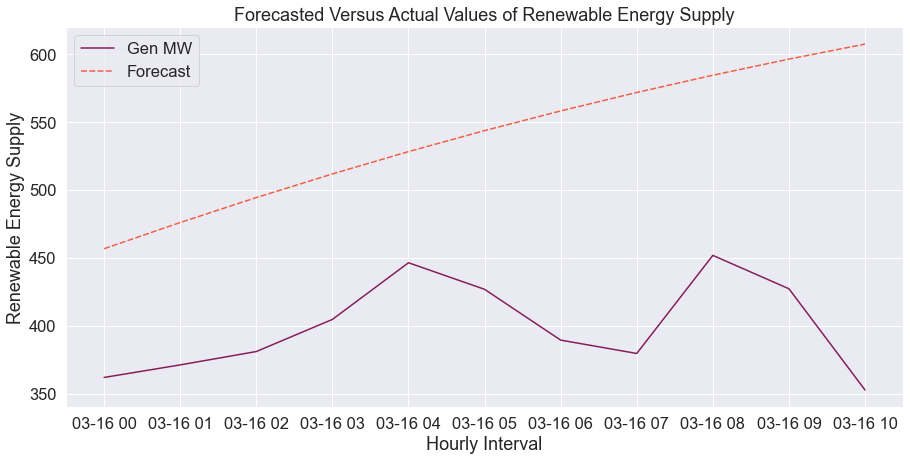

In [ ]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.set(font_scale=1.5)

ax = sns.lineplot(data = df_energy_today[['Gen MW', 'Forecast']],
                 color='g', palette="rocket")
                          
ax.set(xlabel='Hourly Interval',
       ylabel='Renewable Energy Supply',
       title='Forecasted Versus Actual Values of Renewable Energy Supply')

plt.show()

#      Develop and Save Multivariate ARIMA to File

### Import Data and Pre-Processing

In [ ]:
# load dataset using read_csv()
from pandas import read_csv


df = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\forecast_dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
                    Time Zone       Fuel Category  Gen MW
Time Stamp                                               
2020-01-01 00:05:00       EST         Natural Gas  1883.0
2020-01-01 00:05:00       EST             Nuclear  5418.0
2020-01-01 00:05:00       EST  Other Fossil Fuels     1.0
2020-01-01 00:05:00       EST    Other Renewables   277.0
2020-01-01 00:05:00       EST                Wind   883.0


In [ ]:
#organize dataset into wind and solar columns, add values together

df_wind = df.loc[df['Fuel Category'] == ("Wind")]
df_wind = df_wind.drop(['Fuel Category', 'Time Zone'], axis=1)
df_wind.rename(columns={'Gen MW': 'Wind GenMW'}, inplace=True)

df_solar = df.loc[df['Fuel Category'] == ("Other Renewables")]
df_solar = df_solar.drop(['Fuel Category', 'Time Zone'], axis=1)
df_solar.rename(columns={'Gen MW': 'Solar GenMW'}, inplace=True)

df_energy = df_wind
df_energy['Solar GenMW'] = df_solar['Solar GenMW']
df_energy

    

,Wind GenMW,Solar GenMW
Time Stamp,,
2020-01-01 00:05:00,883.0,277.0
2020-01-01 00:10:00,851.0,273.0
2020-01-01 00:15:00,852.0,275.0
2020-01-01 00:20:00,863.0,274.0
2020-01-01 00:25:00,861.0,271.0
...,...,...
2022-03-15 23:30:00,224.0,219.0
2022-03-15 23:35:00,219.0,221.0
2022-03-15 23:40:00,209.0,218.0


In [ ]:
#check for missing values

print(df_energy.isna().any().any())

print(df_energy.isna().sum().sum())


False
0


                     Wind GenMW  Solar GenMW
Time Stamp                                  
2020-01-01 00:00:00  865.727273   275.000000
2020-01-01 01:00:00  804.750000   276.500000
2020-01-01 02:00:00  831.250000   272.416667
2020-01-01 03:00:00  893.166667   273.083333
2020-01-01 04:00:00  920.166667   271.500000


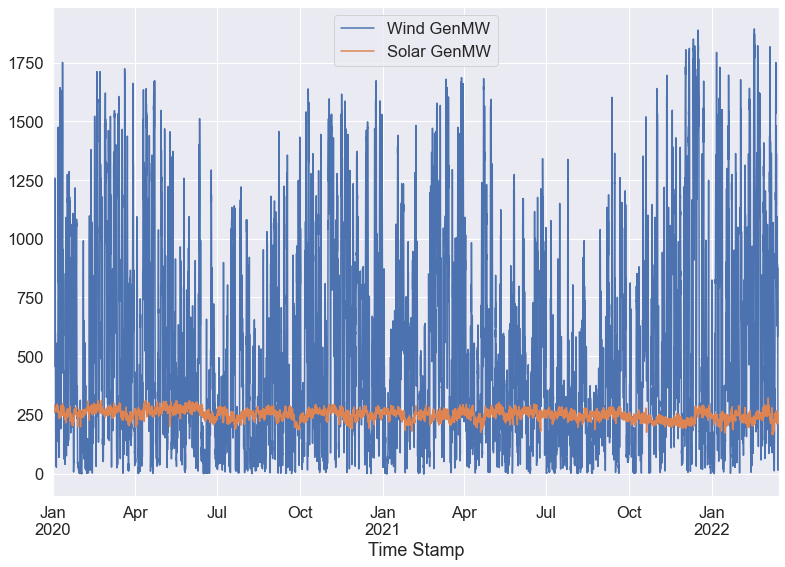

In [ ]:
#resample intervals into mean hourly values
import matplotlib.pyplot as plt
import pandas as pd

series = df_energy

#define figure size in (width, height) for all plots
plt.rcParams['figure.figsize'] = [13, 9]


resample = series.resample('H')
hourly_mean_mw = resample.mean()
print(hourly_mean_mw.head())
hourly_mean_mw.plot()
plt.show()


df_energy = pd.DataFrame(hourly_mean_mw)

### Construct and Save VARMAX Model

In [ ]:
# fit the VARMAX model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy


# load dataset
series = df_energy.values
#series.index = series.index.to_period('m')


# fit model
model = VARMAX(series, order=(2,0,2))
model_fit = model.fit()

series = df_energy


# save model to file
model_fit.save('varmax_model.pkl')
# save the dataset
numpy.save('varmax_data.npy', df_energy)
# save the last ob
numpy.save('varmax_obs.npy', [series.values[-1]])


In [ ]:
# load VARMAX model from file and make a one-step prediction
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
# load model
model = AutoRegResults.load('varmax_model.pkl')
data = numpy.load('varmax_data.npy')
last_ob = numpy.load('varmax_obs.npy')
# make prediction
varmax_predictions = model.predict(start=len(data), end=len(data))
# transform prediction
#yhat = predictions[0] + last_ob[0]
#print('Prediction: %f' % yhat)
print(varmax_predictions)

[[234.03639221 219.53630532]]


In [ ]:
# multi-step out-of-sample forecast
import pandas as pd

start_index = len(data)
end_index = start_index + 23
varmax_forecast = model.predict(start=start_index, end=end_index)

df_varmax = pd.DataFrame(varmax_forecast)
df_varmax.columns = ['Predict_Wind', 'Predict_Solar']

df_varmax.head()

,Predict_Wind,Predict_Solar
0,234.036392,219.536305
1,249.189231,221.082089
2,264.637814,222.476174
3,279.707199,223.778195
4,294.122424,225.007667


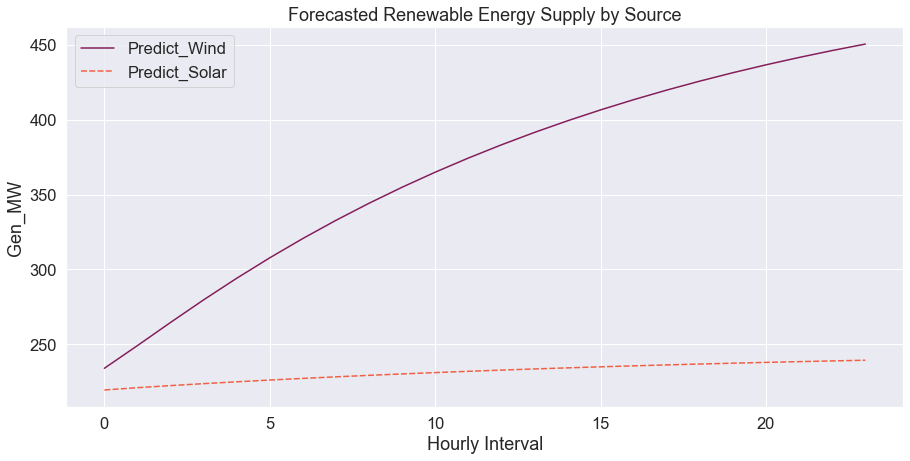

In [ ]:
import seaborn as sns

sns.set(rc={"figure.figsize":(15, 7)})
sns.set(font_scale=1.5)

ax = sns.lineplot(data = df_varmax,
                 color='g', palette="rocket")
                          
ax.set(xlabel='Hourly Interval',
       ylabel='Gen_MW',
       title='Forecasted Renewable Energy Supply by Source')

plt.show()

#### Compare to Actual Values

In [ ]:
df_20220315 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220315rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_20220316 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220316rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

df_actuals = pd.concat([df_20220315, df_20220316], axis=0)
df_actuals

,Time Zone,Fuel Category,Gen MW
Time Stamp,,,
2022-03-15 00:05:00,EDT,Dual Fuel,3013.0
2022-03-15 00:05:00,EDT,Natural Gas,2466.0
2022-03-15 00:05:00,EDT,Nuclear,2059.0
2022-03-15 00:05:00,EDT,Other Fossil Fuels,3.0
2022-03-15 00:05:00,EDT,Other Renewables,229.0
...,...,...,...
2022-03-16 23:50:00,EDT,Nuclear,2057.0
2022-03-16 23:50:00,EDT,Other Fossil Fuels,3.0
2022-03-16 23:50:00,EDT,Other Renewables,223.0


In [ ]:
#organize dataset into wind and solar columns, add values together

df_wind_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Wind")]
df_wind_ac = df_wind_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_wind_ac.rename(columns={'Gen MW': 'Wind GenMW'}, inplace=True)

df_solar_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Other Renewables")]
df_solar_ac = df_solar_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_solar_ac.rename(columns={'Gen MW': 'Solar GenMW'}, inplace=True)

df_energy_ac = df_wind_ac
df_energy_ac['Solar GenMW'] = df_solar_ac['Solar GenMW']
df_energy_ac.head()

,Wind GenMW,Solar GenMW
Time Stamp,,
2022-03-15 00:05:00,775.0,229.0
2022-03-15 00:10:00,763.0,227.0
2022-03-15 00:15:00,752.0,221.0
2022-03-15 00:20:00,749.0,219.0
2022-03-15 00:25:00,749.0,218.0


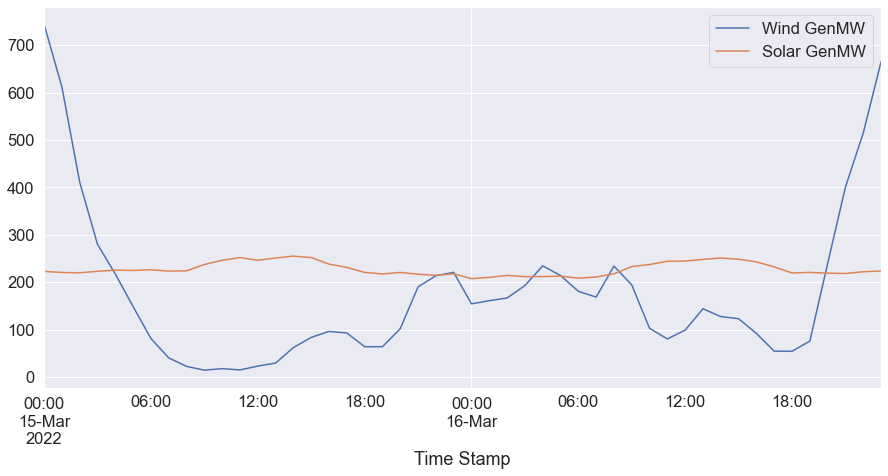

In [ ]:
#resample intervals into mean hourly values

series = df_energy_ac

resample = series.resample('H')
hourly_mean_mw = resample.mean()
#print(hourly_mean_mw.head())
hourly_mean_mw.plot()
plt.show()


df_energy_today = pd.DataFrame(hourly_mean_mw)

In [ ]:
# match TimeStamp values

df_energy0 = df_energy_today[-24:]
df_energy0.head()

,Wind GenMW,Solar GenMW
Time Stamp,,
2022-03-16 00:00:00,154.363636,207.545455
2022-03-16 01:00:00,161.000000,210.166667
2022-03-16 02:00:00,166.666667,214.333333
2022-03-16 03:00:00,193.000000,211.666667
2022-03-16 04:00:00,234.500000,211.916667


#### Add Forecasted Values

In [ ]:
df_varmax.describe()

,Predict_Wind,Predict_Solar
count,24.000000,24.000000
mean,365.262563,231.383003
std,66.601574,6.030501
min,234.036392,219.536305
25%,317.447270,227.001417
50%,378.753074,232.417217
75%,421.218114,236.430713
max,450.423901,239.404509


<ipython-input-72-38a7088005e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy0['Wind_Forecast'] = df_varmax['Predict_Wind'].values
<ipython-input-72-38a7088005e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy0['Solar_Forecast'] = df_varmax['Predict_Solar'].values


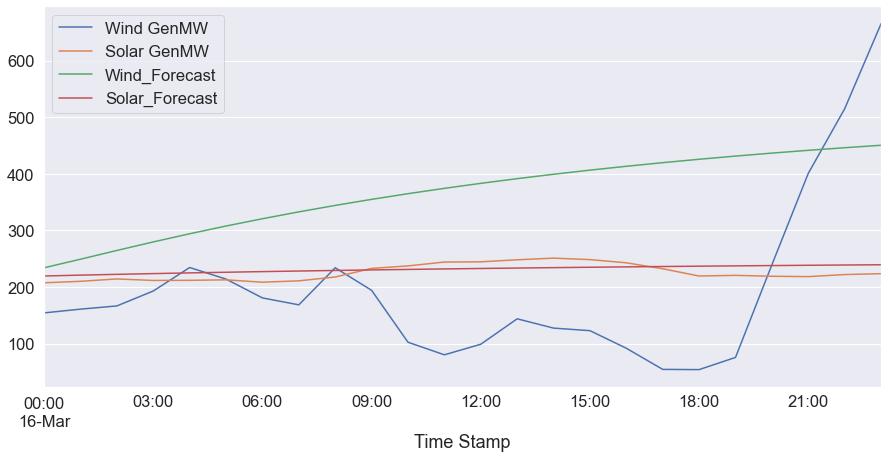

In [ ]:
#series = df_forecast.values

df_energy0['Wind_Forecast'] = df_varmax['Predict_Wind'].values
df_energy0['Solar_Forecast'] = df_varmax['Predict_Solar'].values

df_energy0.plot()
plt.show()

#### Calculate Difference Between Forecasted Sources

In [ ]:
df_energy0['Diff_Wind']=df_energy1['Wind GenMW'].values/df_energy0['Wind_Forecast'].values
df_energy0['Diff_Solar']=df_energy1['Solar GenMW'].values/df_energy0['Solar_Forecast'].values

df_energy0.head()

<ipython-input-74-18a1572ae249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy0['Diff_Wind']=df_energy1['Wind GenMW'].values/df_energy0['Wind_Forecast'].values
<ipython-input-74-18a1572ae249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy0['Diff_Solar']=df_energy1['Solar GenMW'].values/df_energy0['Solar_Forecast'].values


,Wind GenMW,Solar GenMW,Wind_Forecast,Solar_Forecast,Diff_Wind,Diff_Solar
Time Stamp,,,,,,
2022-03-16 00:00:00,154.363636,207.545455,234.036392,219.536305,0.659571,0.945381
2022-03-16 01:00:00,161.000000,210.166667,249.189231,221.082089,0.646095,0.950627
2022-03-16 02:00:00,166.666667,214.333333,264.637814,222.476174,0.629792,0.963399
2022-03-16 03:00:00,193.000000,211.666667,279.707199,223.778195,0.690007,0.945877
2022-03-16 04:00:00,234.500000,211.916667,294.122424,225.007667,0.797287,0.941820


In [ ]:
mean_wind = round(df_energy0['Diff_Wind'].mean(), 3)
mean_solar = round(df_energy0['Diff_Solar'].mean(), 3)

print(mean_wind)
print(mean_solar)

sum_mean = (mean_solar+mean_wind)/2
round(sum_mean, 3)

0.538
0.974


0.756

In [ ]:
#verify calculated means

df_energy0.describe()

,Wind GenMW,Solar GenMW,Wind_Forecast,Solar_Forecast,Diff_Wind,Diff_Solar
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,194.771239,225.462437,365.262563,231.383003,0.537612,0.974245
std,144.967900,14.590391,66.601574,6.030501,0.330809,0.054562
min,54.214286,207.545455,234.036392,219.536305,0.127350,0.915906
25%,101.687500,212.541667,317.447270,227.001417,0.275427,0.929406
50%,163.833333,220.083333,378.753074,232.417217,0.547879,0.947709
75%,219.083333,238.708333,421.218114,236.430713,0.682585,1.027630
max,665.181818,251.083333,450.423901,239.404509,1.476791,1.071563


### Make an additional forecast with novel data

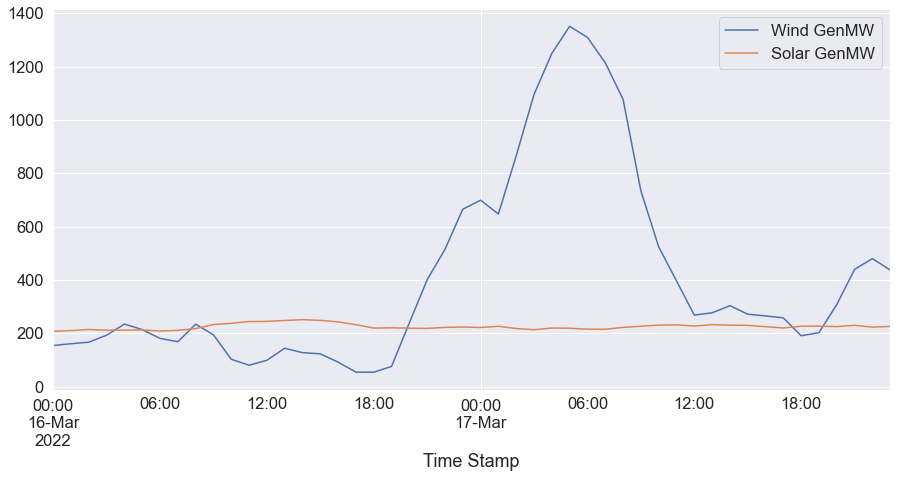

In [ ]:
df_20220316 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220316rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_20220317 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220317rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

df_actuals = pd.concat([df_20220316, df_20220317], axis=0)

#organize dataset into wind and solar columns, add values together

df_wind_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Wind")]
df_wind_ac = df_wind_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_wind_ac.rename(columns={'Gen MW': 'Wind GenMW'}, inplace=True)

df_solar_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Other Renewables")]
df_solar_ac = df_solar_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_solar_ac.rename(columns={'Gen MW': 'Solar GenMW'}, inplace=True)

df_energy_ac = df_wind_ac
df_energy_ac['Solar GenMW'] = df_solar_ac['Solar GenMW']
df_energy_ac.head()

#resample intervals into mean hourly values

series = df_energy_ac

resample = series.resample('H')
hourly_mean_mw = resample.mean()
#print(hourly_mean_mw.head())
hourly_mean_mw.plot()
plt.show()


df_energy_today = pd.DataFrame(hourly_mean_mw)

###  Calculate Model Accuracy with Novel Data

In [ ]:
print(df_varmax.describe())
print(df_energy_today.describe())

       Predict_Wind  Predict_Solar
count     24.000000      24.000000
mean     365.262563     231.383003
std       66.601574       6.030501
min      234.036392     219.536305
25%      317.447270     227.001417
50%      378.753074     232.417217
75%      421.218114     236.430713
max      450.423901     239.404509
        Wind GenMW  Solar GenMW
count    48.000000    48.000000
mean    407.040291   224.867898
std     364.370915    10.927213
min      54.214286   207.545455
25%     165.250000   217.750000
50%     261.500000   223.401515
75%     517.208333   230.645833
max    1350.916667   251.083333


<ipython-input-80-6e56f54b370a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy1['Wind_Forecast'] = df_varmax['Predict_Wind'].values
<ipython-input-80-6e56f54b370a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy1['Solar_Forecast'] = df_varmax['Predict_Solar'].values


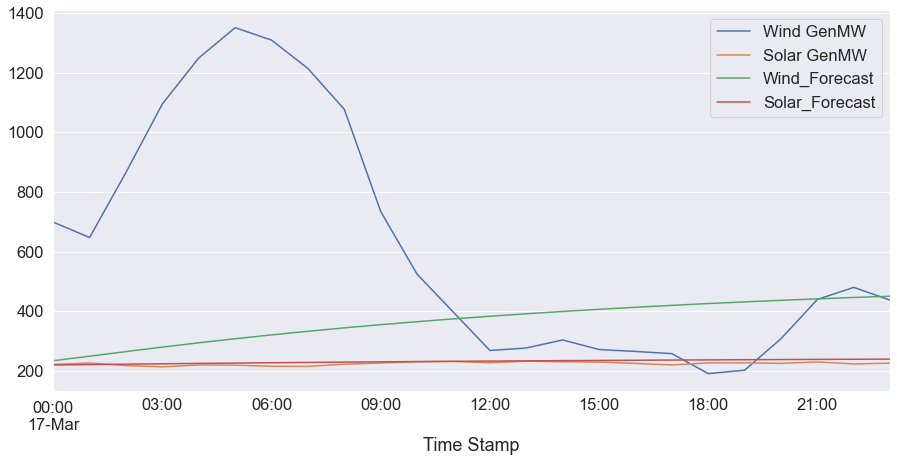

In [ ]:
# match TimeStamp values

df_energy1 = df_energy_today[-24:]

# plot actuals against predicted values

df_energy1['Wind_Forecast'] = df_varmax['Predict_Wind'].values
df_energy1['Solar_Forecast'] = df_varmax['Predict_Solar'].values

df_energy1.plot()
plt.show()

In [ ]:
#add difference columns
df_energy1['Diff_Wind']=df_energy1['Wind GenMW'].values/df_energy1['Wind_Forecast'].values
df_energy1['Diff_Solar']=df_energy1['Solar GenMW'].values/df_energy1['Solar_Forecast'].values

#print(df_energy1.head())

mean_wind = round(df_energy1['Diff_Wind'].mean(), 3)
mean_solar = round(df_energy1['Diff_Solar'].mean(), 3)

print(mean_wind)
print(mean_solar)

sum_mean = (mean_solar+mean_wind)/2
round(sum_mean, 3)

1.899
0.97


<ipython-input-81-2c6cca2a5a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy1['Diff_Wind']=df_energy1['Wind GenMW'].values/df_energy1['Wind_Forecast'].values
<ipython-input-81-2c6cca2a5a57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy1['Diff_Solar']=df_energy1['Solar GenMW'].values/df_energy1['Solar_Forecast'].values


1.434

In [ ]:
#verify accuracy of calculations

df_energy1.describe()

,Wind GenMW,Solar GenMW,Wind_Forecast,Solar_Forecast,Diff_Wind,Diff_Solar
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,619.309343,224.273359,365.262563,231.383003,1.899495,0.969601
std,395.290622,5.512011,66.601574,6.030501,1.421185,0.024370
min,190.833333,213.583333,234.036392,219.536305,0.448269,0.930734
25%,275.458333,219.875000,317.447270,227.001417,0.704043,0.952759
50%,459.833333,225.537879,378.753074,232.417217,1.067587,0.968909
75%,918.562500,227.812500,421.218114,236.430713,3.164717,0.983481
max,1350.916667,232.500000,450.423901,239.404509,4.389180,1.023752


###  Run Model on Novel Data II

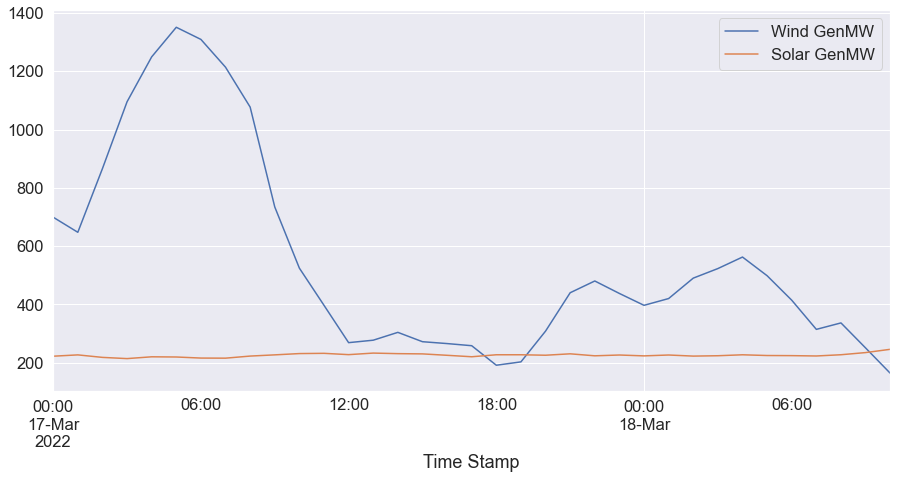

In [ ]:
df_20220317 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220317rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_20220318 = read_csv(r'C:\Users\user\Desktop\MSBA\INFO 588_Capstone Practicum\20220318rtfuelmix.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

df_actuals = pd.concat([df_20220317, df_20220318], axis=0)

#organize dataset into wind and solar columns, add values together

df_wind_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Wind")]
df_wind_ac = df_wind_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_wind_ac.rename(columns={'Gen MW': 'Wind GenMW'}, inplace=True)

df_solar_ac = df_actuals.loc[df_actuals['Fuel Category'] == ("Other Renewables")]
df_solar_ac = df_solar_ac.drop(['Fuel Category', 'Time Zone'], axis=1)
df_solar_ac.rename(columns={'Gen MW': 'Solar GenMW'}, inplace=True)

df_energy_ac = df_wind_ac
df_energy_ac['Solar GenMW'] = df_solar_ac['Solar GenMW']
df_energy_ac.head()

#resample intervals into mean hourly values

series = df_energy_ac

resample = series.resample('H')
hourly_mean_mw = resample.mean()
#print(hourly_mean_mw.head())
hourly_mean_mw.plot()
plt.show()


df_energy_today = pd.DataFrame(hourly_mean_mw)

In [ ]:
print(df_varmax.describe())
print(df_energy_today.describe())

       Predict_Wind  Predict_Solar
count     24.000000      24.000000
mean     365.262563     231.383003
std       66.601574       6.030501
min      234.036392     219.536305
25%      317.447270     227.001417
50%      378.753074     232.417217
75%      421.218114     236.430713
max      450.423901     239.404509
        Wind GenMW  Solar GenMW
count    35.000000    35.000000
mean    549.430952   225.162121
std     347.942493     6.049984
min     163.454545   213.583333
25%     290.208333   222.208333
50%     437.181818   225.166667
75%     673.037879   227.000000
max    1350.916667   245.454545


#### Fit Model to Most Recent Available Renewables Data

<ipython-input-85-204806428525>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy2['Wind_Forecast'] = df_varmax['Predict_Wind'].values
<ipython-input-85-204806428525>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy2['Solar_Forecast'] = df_varmax['Predict_Solar'].values


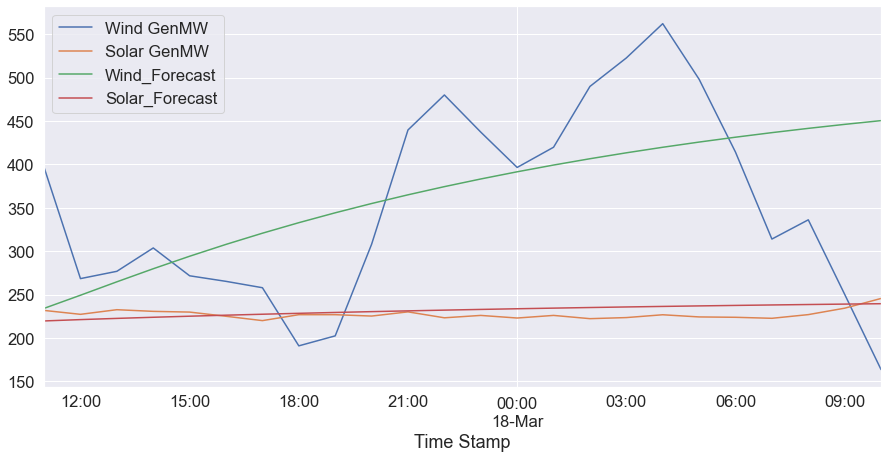

In [ ]:
# match TimeStamp values

df_energy2 = df_energy_today[-24:]

# plot actuals against predicted values

df_energy2['Wind_Forecast'] = df_varmax['Predict_Wind'].values
df_energy2['Solar_Forecast'] = df_varmax['Predict_Solar'].values

df_energy2.plot()
plt.show()

### Calculate Accuracy

In [ ]:
#add difference columns
df_energy2['Diff_Wind']=df_energy2['Wind GenMW'].values/df_energy2['Wind_Forecast'].values
df_energy2['Diff_Solar']=df_energy2['Solar GenMW'].values/df_energy2['Solar_Forecast'].values

#print(df_energy1.head())

mean_wind = round(df_energy2['Diff_Wind'].mean(), 3)
mean_solar = round(df_energy2['Diff_Solar'].mean(), 3)

print(mean_wind)
print(mean_solar)

sum_mean = (mean_solar+mean_wind)/2
round(sum_mean, 3)

0.981
0.983


<ipython-input-86-954fddf85276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy2['Diff_Wind']=df_energy2['Wind GenMW'].values/df_energy2['Wind_Forecast'].values
<ipython-input-86-954fddf85276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy2['Diff_Solar']=df_energy2['Solar GenMW'].values/df_energy2['Solar_Forecast'].values


0.982

In [ ]:
#verify accuracy of calculations

df_energy2.describe()

,Wind GenMW,Solar GenMW,Wind_Forecast,Solar_Forecast,Diff_Wind,Diff_Solar
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,352.684343,227.181503,365.262563,231.383003,0.981479,0.982513
std,112.899488,5.275174,66.601574,6.030501,0.299168,0.035185
min,163.454545,219.916667,234.036392,219.536305,0.362890,0.935359
25%,267.541667,223.666667,317.447270,227.001417,0.793343,0.953514
50%,325.000000,226.291667,378.753074,232.417217,1.029272,0.974083
75%,437.803030,229.812500,421.218114,236.430713,1.178710,1.001497
max,562.166667,245.454545,450.423901,239.404509,1.694181,1.055254


### Compare Differences b/t Model Predictions and Novel Datasets

In [ ]:
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)


print(minmax(df_energy0['Diff_Wind']))
print(minmax(df_energy1['Diff_Wind']))
print(minmax(df_energy2['Diff_Wind']))

(0.12734976813482254, 1.4767906787331022)
(0.44826894668449835, 4.389180366257524)
(0.362890479754287, 1.6941809615818855)


In [ ]:
range1 = minmax(df_energy0['Diff_Wind'])
range2 = minmax(df_energy1['Diff_Wind'])
range3 = minmax(df_energy2['Diff_Wind'])

ranges = pd.DataFrame([range1, range2, range3])
ranges = ranges.transpose()
ranges

,0,1,2
0,0.127350,0.448269,0.362890
1,1.476791,4.389180,1.694181


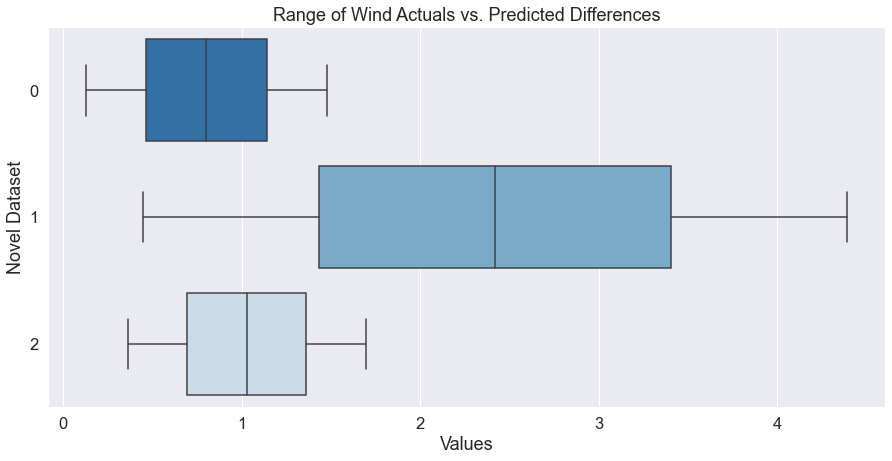

In [ ]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.set(font_scale=1.5)

ax = sns.boxplot( data=ranges, orient='h',
                 color='g', palette="Blues_r")
                          
ax.set(xlabel='Values',
       ylabel='Novel Dataset',
       title='Range of Wind Actuals vs. Predicted Differences')

plt.show()
